In [1]:
from Almanac.Data import get_weather_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Almanac.Models import hw_weekly_frost_date_forecast
import copy

In [2]:
df = get_weather_data("Chicago, IL, 60601, US", "2015-01-01", "2022-12-31")

In [3]:
prediction, os = hw_weekly_frost_date_forecast(df, "Chicago, IL")

In [4]:
prediction

2023-01-08   -12.037374
2023-01-15   -11.349849
2023-01-22    -9.474839
2023-01-29   -14.337255
2023-02-05   -15.174778
2023-02-12   -13.649808
2023-02-19   -10.312296
2023-02-26    -9.112213
2023-03-05    -5.874654
2023-03-12    -3.912150
2023-03-19    -2.687167
2023-03-26    -1.974643
2023-04-02    -2.249625
2023-04-09     1.912894
2023-04-16     0.662864
2023-04-23     1.912886
2023-04-30     4.125398
2023-05-07     4.062901
2023-05-14     6.225413
2023-05-21     9.900435
2023-05-28    10.037888
2023-06-04    11.987969
2023-06-11    14.700455
2023-06-18    13.987964
2023-06-25    14.887972
2023-07-02    16.700493
2023-07-09    16.637991
2023-07-16    18.225505
2023-07-23    18.025516
2023-07-30    16.563026
2023-08-06    17.475526
2023-08-13    16.700529
2023-08-20    15.038063
2023-08-27    15.950569
2023-09-03    13.300580
2023-09-10    13.638062
2023-09-17    13.500557
2023-09-24     9.963083
2023-10-01     9.000591
2023-10-08     4.825600
2023-10-15     2.963112
2023-10-22     2

In [5]:
os

0.5

In [6]:
t = 2015

In [7]:
df_test = get_weather_data(
    "Chicago, IL, 60601, US", f"{str(t)}-01-01", "2023-12-31"
)

In [8]:
df_test

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2015-01-01,-4.3,-8.3,0.0,0.0,0.0,240.0,25.5,NaN,1019.8,NaN
2015-01-02,-1.5,-6.7,2.2,0.0,0.0,NaN,7.8,NaN,1025.3,NaN
2015-01-03,1.6,-0.6,2.8,15.0,0.0,NaN,8.5,NaN,1013.7,NaN
2015-01-04,-3.7,-15.0,2.2,4.6,51.0,305.0,20.2,NaN,NaN,NaN
2015-01-05,-15.6,-18.3,-12.2,3.8,102.0,NaN,17.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-11-04,8.6,6.7,10.7,NaN,NaN,261.0,15.1,NaN,1018.9,NaN
2023-11-05,9.2,5.8,13.0,NaN,NaN,221.0,15.5,NaN,1017.4,NaN
2023-11-06,8.0,3.9,10.9,NaN,NaN,269.0,16.4,NaN,1013.8,NaN


In [9]:
df_test["tmin"].resample("W").min()

time
2015-01-04   -15.0
2015-01-11   -21.7
2015-01-18   -15.0
2015-01-25    -3.3
2015-02-01    -6.1
              ... 
2023-10-15     4.4
2023-10-22     4.4
2023-10-29     3.9
2023-11-05    -3.9
2023-11-12     1.9
Freq: W-SUN, Name: tmin, Length: 463, dtype: float64

In [10]:
years = list(range(1980, 2022))

In [11]:
df_dict = {}
pred_dict = {}
os_dict = {}

In [12]:
for year in years:
    df = get_weather_data("Chicago, IL", "1970-01-01", f"{str(year)}-12-31")
    prediction, os = hw_weekly_frost_date_forecast(df, "Chicago, IL")
    df_dict[year + 1] = get_weather_data(
        "Chicago, IL", f"{str(year+1)}-01-01", f"{str(year+1)}-12-31"
    )
    pred_dict[year + 1] = prediction
    os_dict[year + 1] = os

In [13]:
pred_dict[1982].index

DatetimeIndex(['1982-01-10', '1982-01-17', '1982-01-24', '1982-01-31',
               '1982-02-07', '1982-02-14', '1982-02-21', '1982-02-28',
               '1982-03-07', '1982-03-14', '1982-03-21', '1982-03-28',
               '1982-04-04', '1982-04-11', '1982-04-18', '1982-04-25',
               '1982-05-02', '1982-05-09', '1982-05-16', '1982-05-23',
               '1982-05-30', '1982-06-06', '1982-06-13', '1982-06-20',
               '1982-06-27', '1982-07-04', '1982-07-11', '1982-07-18',
               '1982-07-25', '1982-08-01', '1982-08-08', '1982-08-15',
               '1982-08-22', '1982-08-29', '1982-09-05', '1982-09-12',
               '1982-09-19', '1982-09-26', '1982-10-03', '1982-10-10',
               '1982-10-17', '1982-10-24', '1982-10-31', '1982-11-07',
               '1982-11-14', '1982-11-21', '1982-11-28', '1982-12-05',
               '1982-12-12', '1982-12-19', '1982-12-26', '1983-01-02'],
              dtype='datetime64[ns]', freq='W-SUN')

In [14]:
df_dict[1982]["tmin"].resample("W").min()

time
1982-01-03    -8.9
1982-01-10   -30.0
1982-01-17   -27.2
1982-01-24   -19.4
1982-01-31   -22.8
1982-02-07   -24.4
1982-02-14   -24.4
1982-02-21    -3.3
1982-02-28   -11.1
1982-03-07   -13.3
1982-03-14   -16.1
1982-03-21     0.0
1982-03-28    -7.2
1982-04-04    -7.2
1982-04-11   -12.2
1982-04-18    -0.6
1982-04-25    -1.1
1982-05-02     0.0
1982-05-09     8.3
1982-05-16    13.3
1982-05-23     7.2
1982-05-30    11.7
1982-06-06     6.7
1982-06-13     8.3
1982-06-20     7.2
1982-06-27     8.3
1982-07-04     9.4
1982-07-11    14.4
1982-07-18    16.1
1982-07-25    17.2
1982-08-01    13.9
1982-08-08    17.8
1982-08-15    10.0
1982-08-22    13.3
1982-08-29     7.8
1982-09-05    10.6
1982-09-12    12.2
1982-09-19     6.7
1982-09-26     5.6
1982-10-03     8.9
1982-10-10     7.2
1982-10-17     1.1
1982-10-24    -2.8
1982-10-31    -1.7
1982-11-07    -2.8
1982-11-14    -6.1
1982-11-21    -8.9
1982-11-28    -8.3
1982-12-05     2.8
1982-12-12   -12.8
1982-12-19    -8.9
1982-12-26    -8.3
1983-01

In [15]:
os_dict[1982]

6.5

In [16]:
def binarize(df, cols, thresh=0):
    """
    A function to binarize weather data.
    Sets values less than 0 to 1 and sets values greater then 0 to 0.

    Parameters:

    df : pandas.DataFrame
        A DataFrame object containing weather data.

    cols : str | list
        A string or list of strings containing
        the names of columns in df to binarize.

    thresh : float
        A number to split the binarization on.
        Values below thresh are assigned 1,
        values above thresh are assigned 0.


    Returns:

    df : pandas.DataFrame
        A DataFrame containing the original columns of df and
        the new columns of binarized data.
    """

    if isinstance(cols, str):
        df[cols + "_bin"] = df[cols]

        for i, temp in enumerate(df[cols + "_bin"]):
            if temp <= thresh:
                df[cols + "_bin"].iloc[i] = 1
            else:
                df[cols + "_bin"].iloc[i] = 0

    elif isinstance(cols, list):
        for col in cols:
            df[col + "_bin"] = df[col]

            for i, temp in enumerate(df[col + "_bin"]):
                if temp <= thresh:
                    df[col + "_bin"].iloc[i] = 1
                else:
                    df[col + "_bin"].iloc[i] = 0

    return df

In [17]:
test_pred = pred_dict[1981]

In [18]:
test_pred.iloc[1]

-13.05235537410323

In [19]:
for i, temp in enumerate(test_pred):
    if temp <= 0:
        test_pred.iloc[i] = 1
    else:
        test_pred.iloc[i] = 0

In [20]:
test_pred

1981-01-11    1.0
1981-01-18    1.0
1981-01-25    1.0
1981-02-01    1.0
1981-02-08    1.0
1981-02-15    1.0
1981-02-22    1.0
1981-03-01    1.0
1981-03-08    1.0
1981-03-15    1.0
1981-03-22    1.0
1981-03-29    1.0
1981-04-05    1.0
1981-04-12    0.0
1981-04-19    0.0
1981-04-26    0.0
1981-05-03    0.0
1981-05-10    0.0
1981-05-17    0.0
1981-05-24    0.0
1981-05-31    0.0
1981-06-07    0.0
1981-06-14    0.0
1981-06-21    0.0
1981-06-28    0.0
1981-07-05    0.0
1981-07-12    0.0
1981-07-19    0.0
1981-07-26    0.0
1981-08-02    0.0
1981-08-09    0.0
1981-08-16    0.0
1981-08-23    0.0
1981-08-30    0.0
1981-09-06    0.0
1981-09-13    0.0
1981-09-20    0.0
1981-09-27    0.0
1981-10-04    0.0
1981-10-11    0.0
1981-10-18    0.0
1981-10-25    0.0
1981-11-01    0.0
1981-11-08    1.0
1981-11-15    1.0
1981-11-22    1.0
1981-11-29    1.0
1981-12-06    1.0
1981-12-13    1.0
1981-12-20    1.0
1981-12-27    1.0
1982-01-03    1.0
Freq: W-SUN, dtype: float64

In [21]:
pred_dict_copy = copy.deepcopy(pred_dict)

In [22]:
pred_dict_copy.keys()

dict_keys([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [23]:
for year in pred_dict_copy.keys():
    for i, temp in enumerate(pred_dict_copy[year]):
        if temp <= 0:
            pred_dict_copy[year].iloc[i] = 1
        else:
            pred_dict_copy[year].iloc[i] = 0

In [24]:
pred_dict_copy[1982]

1982-01-10    1.0
1982-01-17    1.0
1982-01-24    1.0
1982-01-31    1.0
1982-02-07    1.0
1982-02-14    1.0
1982-02-21    1.0
1982-02-28    1.0
1982-03-07    1.0
1982-03-14    1.0
1982-03-21    1.0
1982-03-28    1.0
1982-04-04    1.0
1982-04-11    1.0
1982-04-18    1.0
1982-04-25    1.0
1982-05-02    1.0
1982-05-09    0.0
1982-05-16    0.0
1982-05-23    0.0
1982-05-30    0.0
1982-06-06    0.0
1982-06-13    0.0
1982-06-20    0.0
1982-06-27    0.0
1982-07-04    0.0
1982-07-11    0.0
1982-07-18    0.0
1982-07-25    0.0
1982-08-01    0.0
1982-08-08    0.0
1982-08-15    0.0
1982-08-22    0.0
1982-08-29    0.0
1982-09-05    0.0
1982-09-12    0.0
1982-09-19    0.0
1982-09-26    0.0
1982-10-03    1.0
1982-10-10    1.0
1982-10-17    1.0
1982-10-24    1.0
1982-10-31    1.0
1982-11-07    1.0
1982-11-14    1.0
1982-11-21    1.0
1982-11-28    1.0
1982-12-05    1.0
1982-12-12    1.0
1982-12-19    1.0
1982-12-26    1.0
1983-01-02    1.0
Freq: W-SUN, dtype: float64

In [25]:
pred_dict[1982]

1982-01-10   -21.687258
1982-01-17   -18.856922
1982-01-24   -20.016940
1982-01-31   -22.982348
1982-02-07   -20.031004
1982-02-14   -16.272049
1982-02-21   -14.687362
1982-02-28   -12.330950
1982-03-07   -11.823605
1982-03-14   -12.057247
1982-03-21    -9.641153
1982-03-28    -7.249192
1982-04-04    -5.815210
1982-04-11    -3.448758
1982-04-18    -3.015053
1982-04-25    -2.656649
1982-05-02    -2.271729
1982-05-09     0.536558
1982-05-16     3.294671
1982-05-23     3.269665
1982-05-30     5.077228
1982-06-06     6.793033
1982-06-13     7.301720
1982-06-20     8.685115
1982-06-27     9.652321
1982-07-04    11.085162
1982-07-11    10.268119
1982-07-18    11.384419
1982-07-25    10.300694
1982-08-01     9.508091
1982-08-08    10.725880
1982-08-15     9.651339
1982-08-22    10.160013
1982-08-29     8.353468
1982-09-05     6.269822
1982-09-12     4.112754
1982-09-19     2.610861
1982-09-26     0.953158
1982-10-03    -1.688706
1982-10-10    -2.197618
1982-10-17    -3.663913
1982-10-24    -4

In [26]:
def get_frost_dates(data):
    """
    A function that finds the dates of the first and last frost of a season
    for every year in data.
    First frost is defined as the first day after summer where the minimum
    temp is <= 0C.
    Last frost is defined as the last day before summer where the minimum temp
    is <= 0C.


    Parameters:

    data : pandas.DataFrame
        A DataFrame object containing weather data.


    Returns:

    first_frost : list
        A list of the first frost dates of each year.

    last_frost : list
        A list of the last frost dates of each year.
    """

    # If binarized column does not exist,
    # create it.
    if "tmin_bin" in data.columns:
        pass
    else:
        data = binarize(data, "tmin")

    # Create the dict data_year
    # This is a dictionary of DataFrames
    # for each year of data with years as keys
    data_year = {}

    for y in data.index.year.unique():
        data_year[y] = data.loc[data.index.year == y]

    # Create lists of the first and last frost dates.
    last_frost = []
    first_frost = []

    # Divide the years in half.
    # Note this split assumes a location in the Northern Hemisphere
    for y in data_year.keys():
        first_half = data_year[y].loc[data_year[y].index.month < 7]
        second_half = data_year[y].loc[data_year[y].index.month > 7]

        try:
            last_frost.append(
                first_half["tmin_bin"][first_half["tmin_bin"] == 1].index[-1]
            )
        except Exception:
            last_frost.append(None)

        try:
            first_frost.append(
                second_half["tmin_bin"][second_half["tmin_bin"] == 1].index[0]
            )
        except Exception:
            first_frost.append(None)

    return first_frost, last_frost

In [27]:
last_frost_pred = []
first_frost_pred = []

In [28]:
for year in pred_dict_copy.keys():
    pred_dict_copy[year].drop(pred_dict_copy[year].index[-1], inplace=True)

In [29]:
for year in pred_dict_copy.keys():
    first_half = pred_dict_copy[year].loc[pred_dict_copy[year].index.month < 7]
    second_half = pred_dict_copy[year].loc[
        pred_dict_copy[year].index.month > 7
    ]

    try:
        last_frost_pred.append(first_half[first_half == 1].index[-1])
    except Exception:
        last_frost_pred.append(None)

    try:
        first_frost_pred.append(second_half[second_half == 1].index[0])
    except Exception:
        first_frost_pred.append(None)

In [30]:
first_frost_pred

[Timestamp('1981-08-02 00:00:00'),
 Timestamp('1982-10-03 00:00:00'),
 Timestamp('1983-11-06 00:00:00'),
 Timestamp('1984-10-14 00:00:00'),
 Timestamp('1985-11-03 00:00:00'),
 Timestamp('1986-10-19 00:00:00'),
 Timestamp('1987-11-15 00:00:00'),
 Timestamp('1988-10-30 00:00:00'),
 Timestamp('1989-10-29 00:00:00'),
 Timestamp('1990-10-14 00:00:00'),
 Timestamp('1991-10-27 00:00:00'),
 Timestamp('1992-11-08 00:00:00'),
 Timestamp('1993-10-24 00:00:00'),
 Timestamp('1994-10-09 00:00:00'),
 Timestamp('1995-10-29 00:00:00'),
 Timestamp('1996-10-06 00:00:00'),
 Timestamp('1997-10-05 00:00:00'),
 Timestamp('1998-11-01 00:00:00'),
 Timestamp('1999-10-17 00:00:00'),
 Timestamp('2000-10-15 00:00:00'),
 Timestamp('2001-09-30 00:00:00'),
 Timestamp('2002-10-27 00:00:00'),
 Timestamp('2003-10-05 00:00:00'),
 Timestamp('2004-10-31 00:00:00'),
 Timestamp('2005-11-06 00:00:00'),
 Timestamp('2006-11-05 00:00:00'),
 Timestamp('2007-10-14 00:00:00'),
 Timestamp('2008-10-12 00:00:00'),
 Timestamp('2009-10-

In [31]:
last_frost_pred

[Timestamp('1981-06-28 00:00:00'),
 Timestamp('1982-05-02 00:00:00'),
 Timestamp('1983-03-20 00:00:00'),
 Timestamp('1984-04-29 00:00:00'),
 Timestamp('1985-03-31 00:00:00'),
 Timestamp('1986-04-13 00:00:00'),
 Timestamp('1987-03-22 00:00:00'),
 Timestamp('1988-04-03 00:00:00'),
 Timestamp('1989-03-26 00:00:00'),
 Timestamp('1990-04-15 00:00:00'),
 Timestamp('1991-03-24 00:00:00'),
 Timestamp('1992-03-08 00:00:00'),
 Timestamp('1993-03-28 00:00:00'),
 Timestamp('1994-04-17 00:00:00'),
 Timestamp('1995-03-19 00:00:00'),
 Timestamp('1996-04-14 00:00:00'),
 Timestamp('1997-04-13 00:00:00'),
 Timestamp('1998-03-08 00:00:00'),
 Timestamp('1999-03-28 00:00:00'),
 Timestamp('2000-03-26 00:00:00'),
 Timestamp('2001-04-08 00:00:00'),
 Timestamp('2002-03-31 00:00:00'),
 Timestamp('2003-04-27 00:00:00'),
 Timestamp('2004-04-04 00:00:00'),
 Timestamp('2005-04-03 00:00:00'),
 Timestamp('2006-04-02 00:00:00'),
 Timestamp('2007-04-08 00:00:00'),
 Timestamp('2008-04-20 00:00:00'),
 Timestamp('2009-04-

In [32]:
last_frost = []
first_frost = []

In [33]:
for year in df_dict.keys():
    first, last = get_frost_dates(df_dict[year])
    first_frost.append(first)
    last_frost.append(last)

In [34]:
first_frost

[[Timestamp('1981-10-03 00:00:00')],
 [Timestamp('1982-10-22 00:00:00')],
 [Timestamp('1983-11-05 00:00:00')],
 [Timestamp('1984-10-24 00:00:00')],
 [Timestamp('1985-11-17 00:00:00')],
 [Timestamp('1986-11-02 00:00:00')],
 [Timestamp('1987-10-08 00:00:00')],
 [Timestamp('1988-10-13 00:00:00')],
 [Timestamp('1989-11-02 00:00:00')],
 [Timestamp('1990-10-19 00:00:00')],
 [Timestamp('1991-10-16 00:00:00')],
 [Timestamp('1992-10-17 00:00:00')],
 [Timestamp('1993-10-10 00:00:00')],
 [Timestamp('1994-11-19 00:00:00')],
 [Timestamp('1995-11-02 00:00:00')],
 [Timestamp('1996-10-30 00:00:00')],
 [Timestamp('1997-10-27 00:00:00')],
 [Timestamp('1998-11-06 00:00:00')],
 [Timestamp('1999-10-24 00:00:00')],
 [Timestamp('2000-10-07 00:00:00')],
 [Timestamp('2001-10-07 00:00:00')],
 [Timestamp('2002-11-01 00:00:00')],
 [Timestamp('2003-10-02 00:00:00')],
 [Timestamp('2004-10-17 00:00:00')],
 [Timestamp('2005-11-10 00:00:00')],
 [Timestamp('2006-10-12 00:00:00')],
 [Timestamp('2007-11-07 00:00:00')],
 

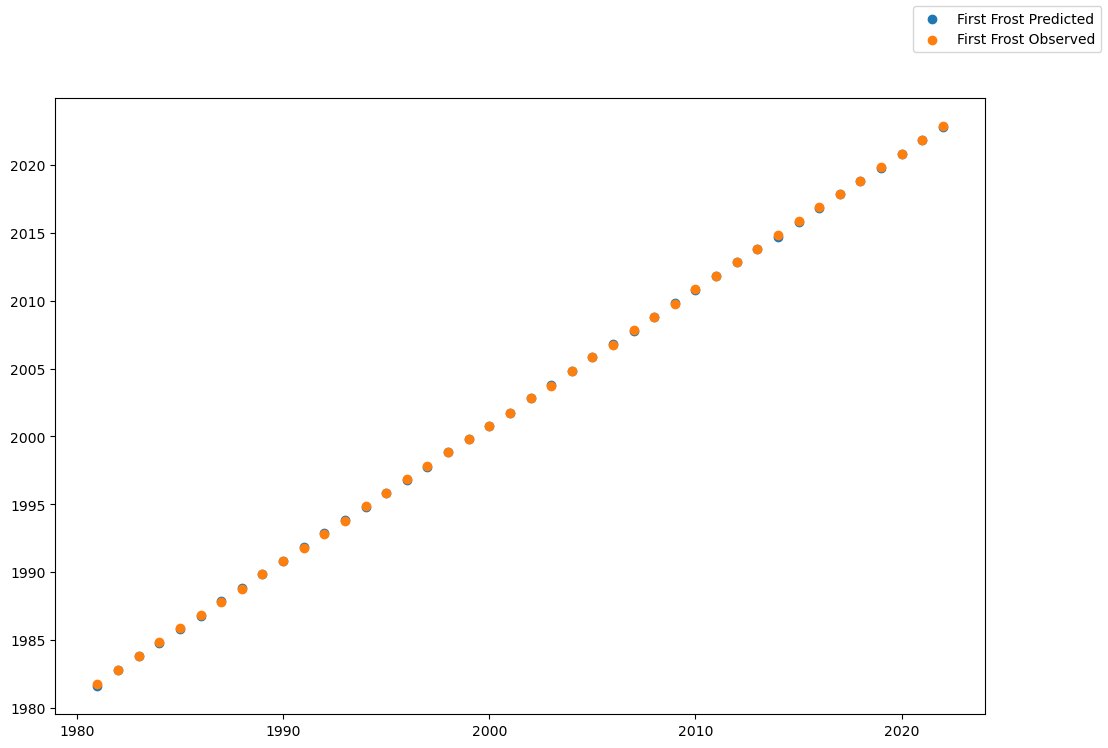

In [35]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(
    x=range(1981, 2023), y=first_frost_pred, label="First Frost Predicted"
)
plt.scatter(x=range(1981, 2023), y=first_frost, label="First Frost Observed")
fig.legend()

In [36]:
first_frost_pred[0] - first_frost[0][0]

Timedelta('-62 days +00:00:00')

In [37]:
first_frost_diffs = []

In [38]:
len(first_frost_pred)

42

In [39]:
for i in range(len(first_frost_pred)):
    first_frost_diffs.append(first_frost_pred[i] - first_frost[i][0])

In [40]:
first_frost_diffs[0].days

-62

Text(0, 0.5, 'days')

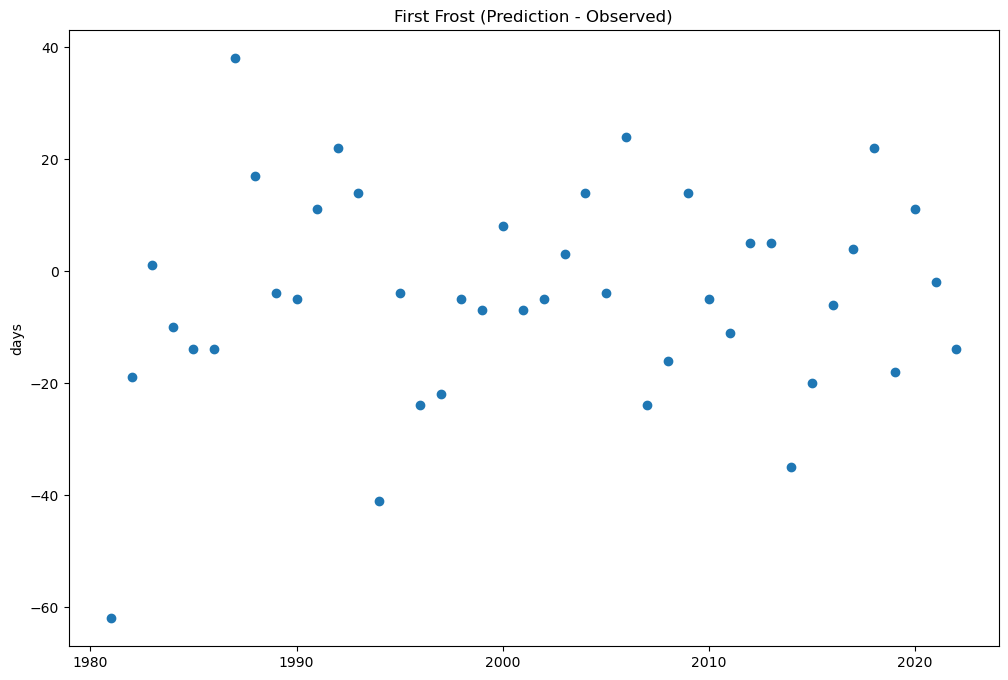

In [41]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x=range(1981, 2023), y=[x.days for x in first_frost_diffs])
fig.get_axes()[0].set_title("First Frost (Prediction - Observed)")
fig.get_axes()[0].set_ylabel("days")

In [42]:
last_frost_diffs = []

In [43]:
for i in range(len(last_frost_pred)):
    last_frost_diffs.append(last_frost_pred[i] - last_frost[i][0])

Text(0, 0.5, 'days')

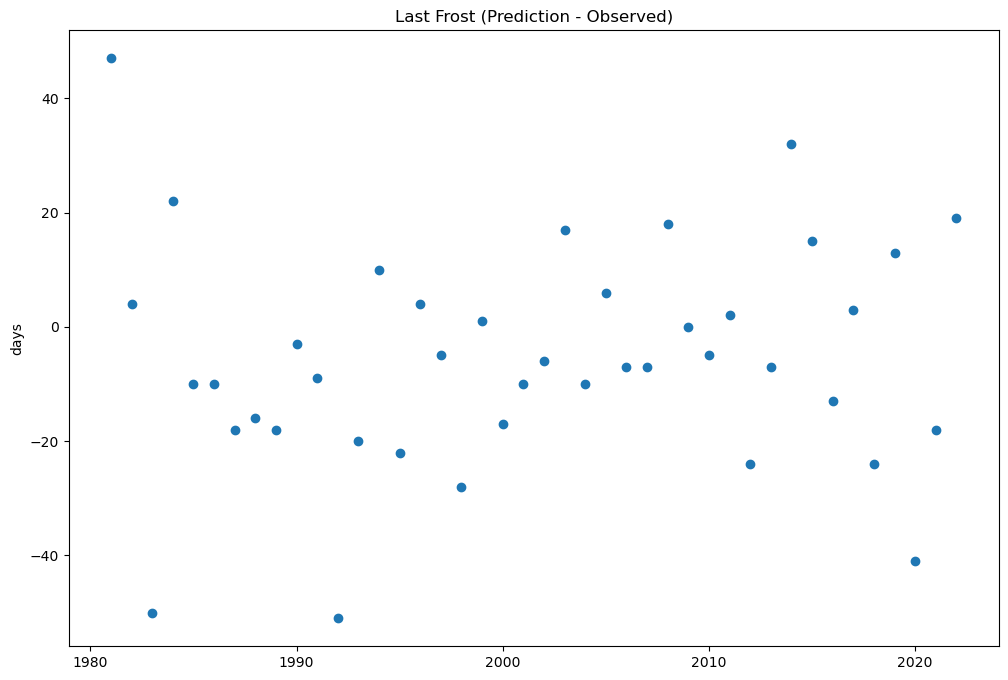

In [44]:
fig2 = plt.figure(figsize=(12, 8))
plt.scatter(x=range(1981, 2023), y=[x.days for x in last_frost_diffs])
fig2.get_axes()[0].set_title("Last Frost (Prediction - Observed)")
fig2.get_axes()[0].set_ylabel("days")

In [45]:
first_frost[0]

[Timestamp('1981-10-03 00:00:00')]

In [46]:
first_frost_pred[0]

Timestamp('1981-08-02 00:00:00')

In [47]:
first_frost_pred[0] - first_frost[0][0]

Timedelta('-62 days +00:00:00')

In [48]:
last_frost[0]

[Timestamp('1981-05-12 00:00:00')]

Offset = 0

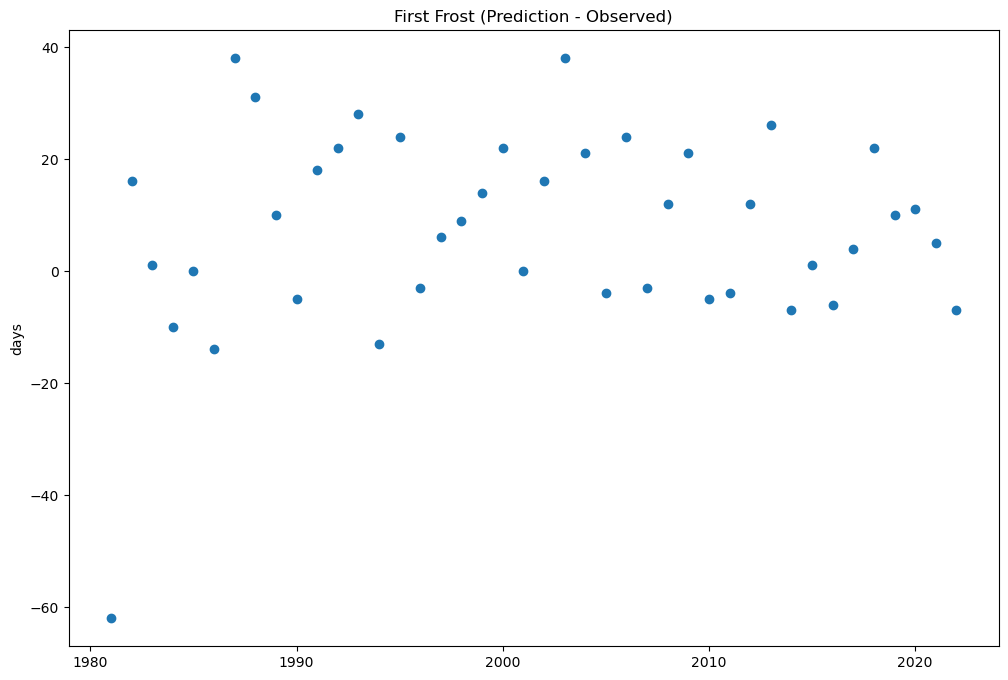

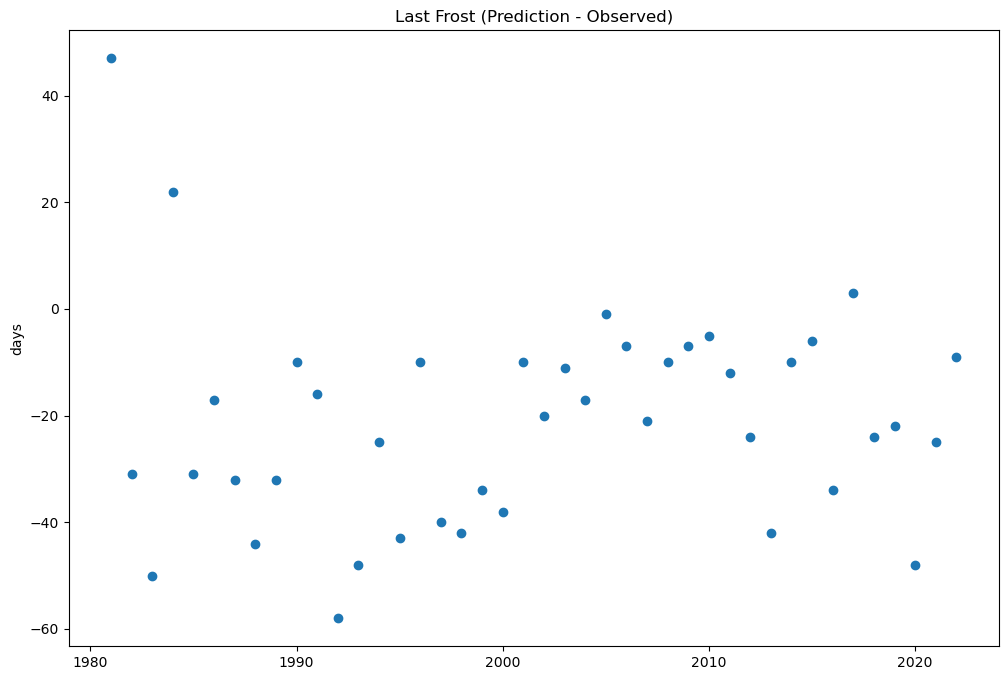

[Timestamp('1981-05-12 00:00:00')]

Max Offset = 3.5
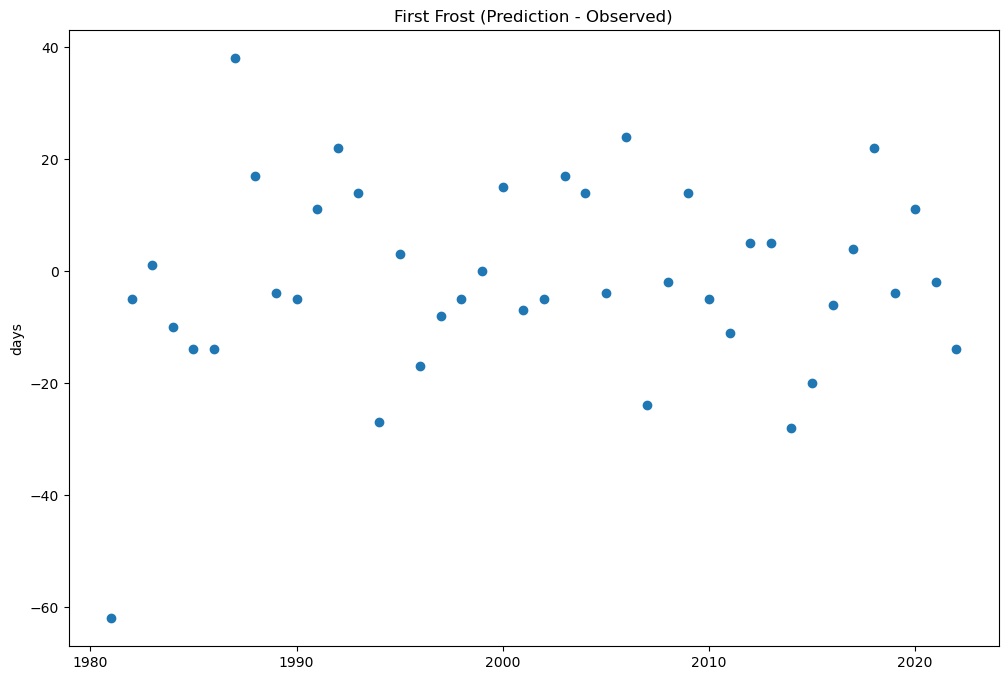

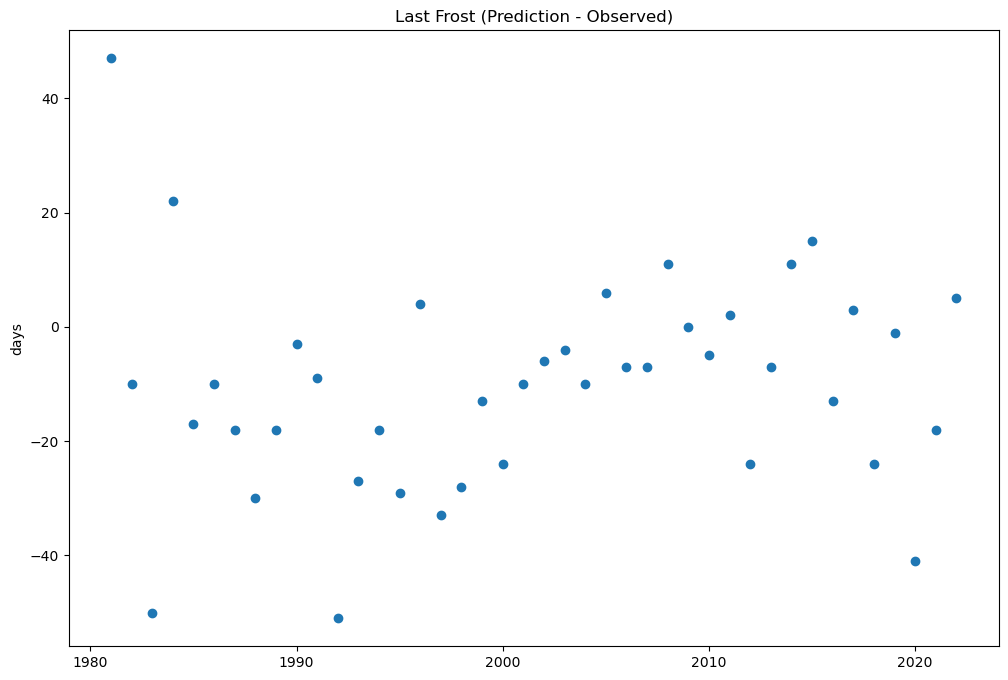

Max Offset = 6.5
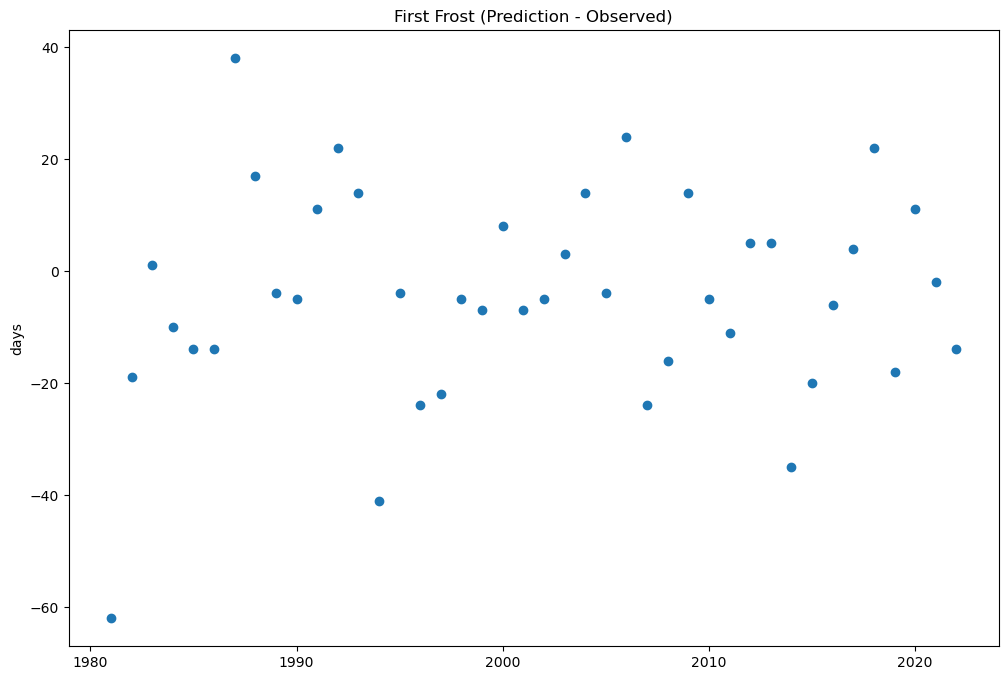

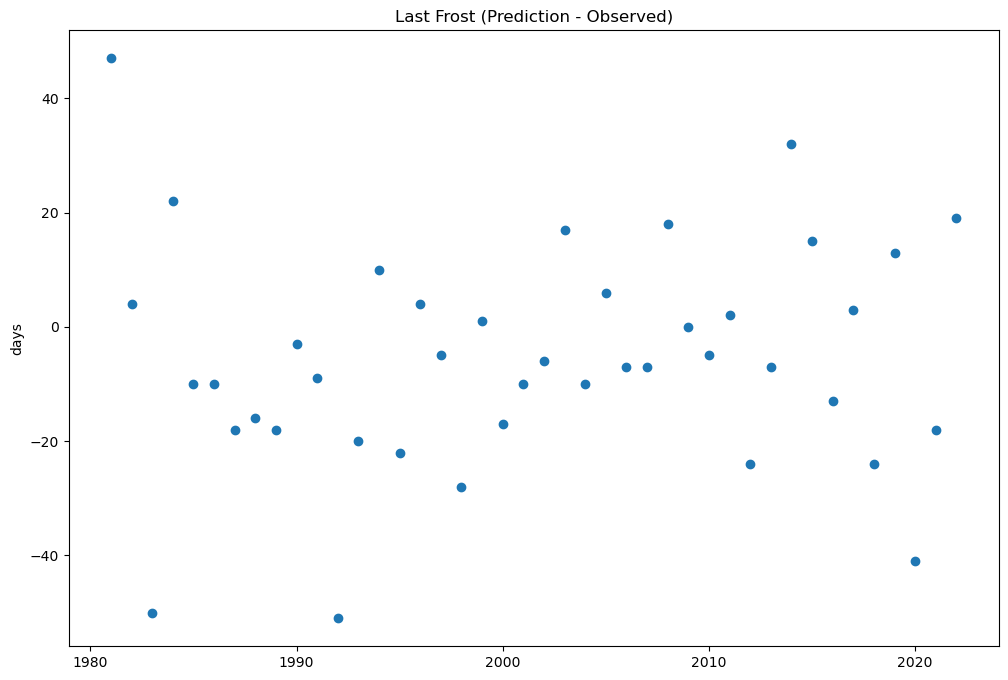

In [82]:
import scipy.stats

a, b = np.polyfit(df["tmin"], df["tmax"], 1)
result = scipy.stats.linregress(df["tmin"], df["tmax"])

Text(-20, 20, 'R: 0.9496077702043431')

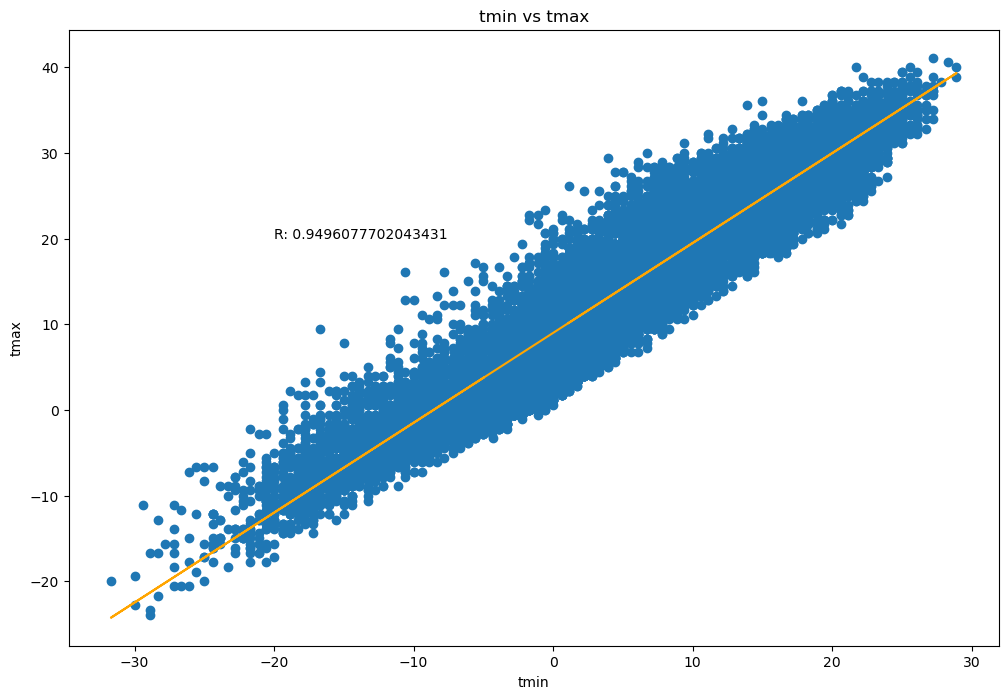

In [100]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x=df["tmin"], y=df["tmax"])
plt.plot(df["tmin"], a * df["tmin"] + b, color="orange")
ax = fig.get_axes()[0]
ax.set_title("tmin vs tmax")
ax.set_xlabel("tmin")
ax.set_ylabel("tmax")
ax.text(-20, 20, f"R: {result.rvalue}")